In [10]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [12]:
files = ['1997-wnba-attendance.csv', '1998-wnba-attendance.csv', '1999-wnba-attendance.csv', '2000-wnba-attendance.csv', '2001-wnba-attendance.csv', '2002-wnba-attendance.csv', '2003-wnba-attendance.csv', '2004-wnba-attendance.csv', '2005-wnba-attendance.csv', '2006-wnba-attendance.csv', '2007-wnba-attendance.csv', '2008-wnba-attendance.csv', '2009-wnba-attendance.csv', '2010-wnba-attendance.csv', '2011-wnba-attendance.csv', '2012-wnba-attendance.csv', '2013-wnba-attendance.csv', '2014-wnba-attendance.csv', '2015-wnba-attendance.csv', '2016-wnba-attendance.csv', '2017-wnba-attendance.csv', '2018-wnba-attendance.csv', '2019-wnba-attendance.csv', '2021-wnba-attendance.csv', '2022-wnba-attendance.csv', '2023-wnba-attendance.csv', '2024-wnba-attendance.csv']

In [13]:
files_1 = ['1997-per-game-stats.csv', '1998-per-game-stats.csv', '1999-per-game-stats.csv', '2000-per-game-stats.csv', '2001-per-game-stats.csv', '2002-per-game-stats.csv', '2003-per-game-stats.csv', '2004-per-game-stats.csv', '2005-per-game-stats.csv', '2006-per-game-stats.csv', '2007-per-game-stats.csv', '2008-per-game-stats.csv', '2009-per-game-stats.csv', '2010-per-game-stats.csv', '2011-per-game-stats.csv', '2012-per-game-stats.csv', '2013-per-game-stats.csv', '2014-per-game-stats.csv', '2015-per-game-stats.csv', '2016-per-game-stats.csv', '2017-per-game-stats.csv', '2018-per-game-stats.csv', '2019-per-game-stats.csv', '2020-per-game-stats.csv', '2021-per-game-stats.csv', '2022-per-game-stats.csv', '2023-per-game-stats.csv', '2024-per-game-stats.csv']

In [14]:
files_2 = ['1997-advanced-stats.csv', '1998-advanced-stats.csv', '1999-advanced-stats.csv', '2000-advanced-stats.csv', '2001-advanced-stats.csv', '2002-advanced-stats.csv', '2003-advanced-stats.csv', '2004-advanced-stats.csv', '2005-advanced-stats.csv', '2006-advanced-stats.csv', '2007-advanced-stats.csv', '2008-advanced-stats.csv', '2009-advanced-stats.csv', '2010-advanced-stats.csv', '2011-advanced-stats.csv', '2012-advanced-stats.csv', '2013-advanced-stats.csv', '2014-advanced-stats.csv', '2015-advanced-stats.csv', '2016-advanced-stats.csv', '2017-advanced-stats.csv', '2018-advanced-stats.csv', '2019-advanced-stats.csv', '2020-advanced-stats.csv', '2021-advanced-stats.csv', '2022-advanced-stats.csv', '2023-advanced-stats.csv', '2024-advanced-stats.csv']

In [123]:
attendance = pd.concat([pd.read_csv("../data/"+fp).assign(Year=os.path.basename(fp)) for fp in files])
attendance['Year'] = attendance['Year'].str.split('-').str[0].astype(int)
attendance

,Team,Num Games,Low,High,Total,Average,Year
0,Phoenix Mercury,14,10898,17747,191835,13702.500000,1997
1,New York Liberty,14,8554,18051,185786,13270.428571,1997
2,Houston Comets,14,5933,16285,135842,9703.000000,1997
3,Los Angeles Sparks,14,5987,14457,125034,8931.000000,1997
4,Charlotte Sting,14,6045,18937,116296,8306.857143,1997
...,...,...,...,...,...,...,...
7,Chicago Sky,20,7807,9872,175148,8757.400000,2024
8,Connecticut Sun,20,5346,19125,169012,8450.600000,2024
9,Washington Mystics,20,4200,20711,130830,6541.500000,2024
10,Dallas Wings,20,5129,6251,118217,5910.850000,2024


In [392]:
game_stats = pd.concat([pd.read_csv("../data/"+fp).assign(Year=os.path.basename(fp)) for fp in files_1])
game_stats['Year'] = game_stats['Year'].str.split('-').str[0].astype(int)
game_stats['FT%'] = game_stats['FT%'] * 100
game_stats['Team'] = game_stats['Team'].str.split('*').str[0]
game_stats

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Los Angeles Sparks,28,204.5,28.4,63.6,0.446,2.3,8.6,0.269,...,10.4,24.4,34.8,17.7,9.3,4.9,18.9,21.5,74.0,1997
1,2.0,Houston Comets,28,201.8,25.0,59.3,0.422,6.0,17.3,0.348,...,11.3,19.4,30.7,13.9,11.1,2.4,17.6,19.1,71.8,1997
2,3.0,Cleveland Rockers,28,202.7,25.9,58.3,0.444,2.3,6.3,0.367,...,9.5,22.3,31.8,16.3,9.1,3.1,18.8,18.4,70.2,1997
3,4.0,Phoenix Mercury,28,202.7,23.6,63.1,0.373,4.8,15.6,0.307,...,11.5,21.4,32.9,15.6,12.3,2.9,17.0,20.4,69.2,1997
4,5.0,New York Liberty,28,202.7,25.3,61.3,0.412,3.3,12.1,0.274,...,11.4,21.4,32.9,17.3,10.3,4.1,19.1,19.9,68.3,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9.0,Washington Mystics,40,201.2,29.0,67.0,0.433,9.7,26.6,0.366,...,7.1,24.8,31.9,21.6,7.3,3.4,15.1,18.4,79.3,2024
9,10.0,Los Angeles Sparks,40,200.6,28.1,66.4,0.423,7.2,22.6,0.320,...,7.4,25.3,32.7,19.7,7.3,3.2,15.0,17.9,78.4,2024
10,11.0,Chicago Sky,40,200.0,29.7,70.3,0.422,4.8,14.9,0.323,...,10.9,25.8,36.6,19.0,7.0,3.8,13.1,19.0,77.4,2024
11,12.0,Atlanta Dream,40,201.9,27.8,68.1,0.408,6.0,19.4,0.308,...,9.2,26.9,36.1,18.4,7.2,3.7,12.5,16.9,77.0,2024


In [394]:
game_stats_1 = pd.concat([pd.read_csv("../data/"+fp, skiprows=1).assign(Year=os.path.basename(fp)) for fp in files_2])
game_stats_1['Year'] = game_stats_1['Year'].str.split('-').str[0].astype(int)
game_stats_1[['eFG%', 'eFG%.1']] = game_stats_1[['eFG%', 'eFG%.1']] * 100
game_stats_1['Team'] = game_stats_1['Team'].str.split('*').str[0]
game_stats_1

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,ORB%,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Year
0,1.0,Houston Comets,28.8,18.0,10.0,22,6,6.32,-0.78,5.47,...,36.2,0.266,NaN,44.4,22.3,64.7,0.236,NaN,Compaq Center,1997
1,2.0,Phoenix Mercury,27.9,16.0,12.0,20,8,4.00,-0.49,3.44,...,33.2,0.274,NaN,44.1,24.2,68.5,0.245,NaN,America West Arena,1997
2,3.0,New York Liberty,27.5,17.0,11.0,17,11,2.39,-0.32,2.22,...,34.6,0.236,NaN,42.2,22.7,64.7,0.246,NaN,Madison Square Garden (IV),1997
3,4.0,Los Angeles Sparks,25.5,14.0,14.0,17,11,2.21,-0.28,1.94,...,32.7,0.235,NaN,42.3,19.4,67.9,0.263,NaN,Great Western Forum,1997
4,5.0,Cleveland Rockers,28.1,15.0,13.0,16,12,1.79,-0.22,1.56,...,32.2,0.276,NaN,44.9,20.2,67.1,0.219,NaN,Gund Arena,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9.0,Phoenix Mercury,30.4,19.0,21.0,15,25,-3.30,0.33,-2.97,...,20.0,0.222,NaN,49.6,13.1,71.6,0.189,NaN,NaN,2024
9,10.0,Chicago Sky,26.1,13.0,27.0,12,28,-5.13,0.46,-4.67,...,29.5,0.187,NaN,49.9,14.2,76.8,0.228,NaN,NaN,2024
10,11.0,Los Angeles Sparks,27.0,8.0,32.0,9,31,-7.23,0.92,-6.30,...,22.0,0.226,NaN,52.2,14.2,76.1,0.211,NaN,NaN,2024
11,12.0,Dallas Wings,26.8,9.0,31.0,9,31,-7.93,0.75,-7.18,...,30.2,0.206,NaN,53.6,13.8,73.4,0.236,NaN,NaN,2024


In [20]:
elo_stats = pd.read_csv('../data/wnba_elo.csv')
elo_stats

,season,date,playoff,neutral,status,home_team,away_team,home_team_abbr,away_team_abbr,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,commissioners_cup_final
0,1997,1997-06-20,0,0,post,Las Vegas Aces,Sacramento Monarchs,LVA,SAC,1500.000000,1500.000000,0.613137,0.386863,60,70,1480.965871,1519.034129,0
1,1997,1997-06-20,0,0,post,Los Angeles Sparks,New York Liberty,LAS,NYL,1500.000000,1500.000000,0.613137,0.386863,57,67,1480.965871,1519.034129,0
2,1997,1997-06-20,0,0,post,Cleveland Rockers,Houston Comets,CLE,HOU,1500.000000,1500.000000,0.613137,0.386863,56,76,1469.955804,1530.044196,0
3,1997,1997-06-21,0,0,post,Phoenix Mercury,Charlotte Sting,PHO,CHA,1500.000000,1500.000000,0.613137,0.386863,76,59,1514.912022,1485.087978,0
4,1997,1997-06-22,0,0,post,Sacramento Monarchs,New York Liberty,SAC,NYL,1519.034129,1519.034129,0.613137,0.386863,62,73,1498.837413,1539.230844,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,2022,2022-09-08,1,0,post,Chicago Sky,Connecticut Sun,CHI,CON,1626.455038,1658.075826,0.586161,0.413839,63,72,1609.667208,1674.863657,0
5837,2022,2022-09-11,1,0,post,Las Vegas Aces,Connecticut Sun,LVA,CON,1679.682478,1674.863657,0.648014,0.351986,67,64,1684.761569,1669.784565,0
5838,2022,2022-09-13,1,0,post,Las Vegas Aces,Connecticut Sun,LVA,CON,1684.761569,1669.784565,0.664500,0.335500,85,71,1695.795823,1658.750311,0
5839,2022,2022-09-15,1,0,post,Connecticut Sun,Las Vegas Aces,CON,LVA,1658.750311,1695.795823,0.576661,0.423339,105,76,1682.996272,1671.549863,0


# Game stats for competition analysis

In [22]:
turnovers = game_stats[['TOV', 'Year']][game_stats['Team']=='League Average']
turnovers

,TOV,Year
8,18.5,1997
10,17.0,1998
12,15.6,1999
16,15.7,2000
16,14.9,2001
16,14.8,2002
14,14.3,2003
13,14.6,2004
13,14.6,2005
14,15.6,2006


Text(0.5, 1.0, 'League Average of Turnovers per season')

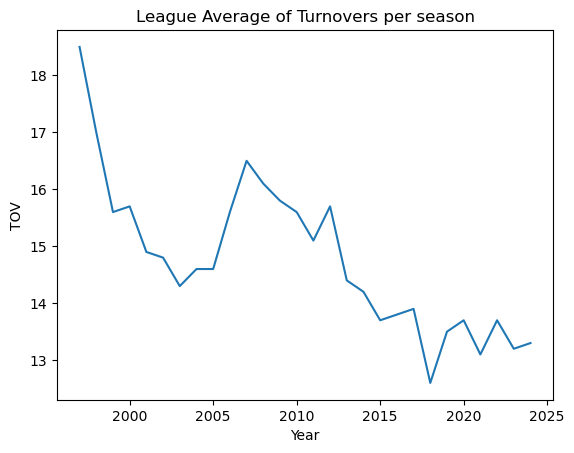

In [990]:
sns.lineplot(data = turnovers,
           x='Year',
           y = 'TOV')

plt.title('League Average of Turnovers per season')

In [1022]:
tov_1 = game_stats_1[['Team', 'TOV%', 'TOV%.1', 'Year']]
tov_1 = tov_1[tov_1['Year'].between(2010, 2024)]
tov_1

,Team,TOV%,TOV%.1,Year
0,Seattle Storm,17.1,17.3,2010
1,Indiana Fever,18.3,19.8,2010
2,Washington Mystics,19.6,18.0,2010
3,New York Liberty,16.7,17.8,2010
4,Atlanta Dream,16.8,17.6,2010
...,...,...,...,...
8,Phoenix Mercury,15.1,13.1,2024
9,Chicago Sky,14.3,14.2,2024
10,Los Angeles Sparks,16.6,14.2,2024
11,Dallas Wings,15.8,13.8,2024


In [24]:
fouls = game_stats[['PF', 'Year']][game_stats['Team']=='League Average']
fouls

,PF,Year
8,19.6,1997
10,20.3,1998
12,20.5,1999
16,20.4,2000
16,18.8,2001
16,19.3,2002
14,18.9,2003
13,19.0,2004
13,19.7,2005
14,19.6,2006


<Axes: xlabel='Year', ylabel='PF'>

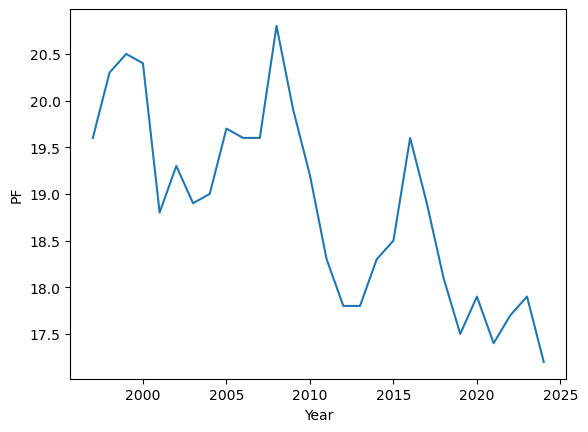

In [25]:
sns.lineplot(data = fouls,
           x='Year',
           y = 'PF')

In [26]:
dreb = game_stats_1[['DRB%', 'Year']][game_stats_1['Team']=='League Average']
dreb

,DRB%,Year
8,66.1,1997
10,67.7,1998
12,67.6,1999
16,67.6,2000
16,68.1,2001
16,67.8,2002
14,68.2,2003
13,68.6,2004
13,69.2,2005
14,69.7,2006


<Axes: xlabel='Year', ylabel='DRB%'>

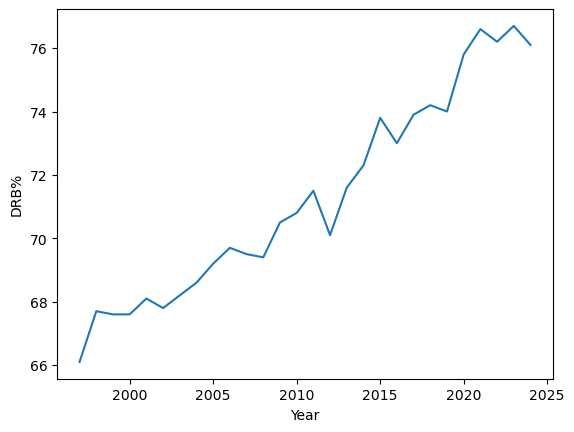

In [27]:
sns.lineplot(data = dreb,
           x='Year',
           y = 'DRB%')

In [28]:
oreb = game_stats_1[['ORB%', 'Year']][game_stats_1['Team']=='League Average']
oreb

,ORB%,Year
8,33.9,1997
10,32.3,1998
12,32.4,1999
16,32.4,2000
16,31.9,2001
16,32.2,2002
14,31.8,2003
13,31.4,2004
13,30.8,2005
14,30.3,2006


<Axes: xlabel='Year', ylabel='ORB%'>

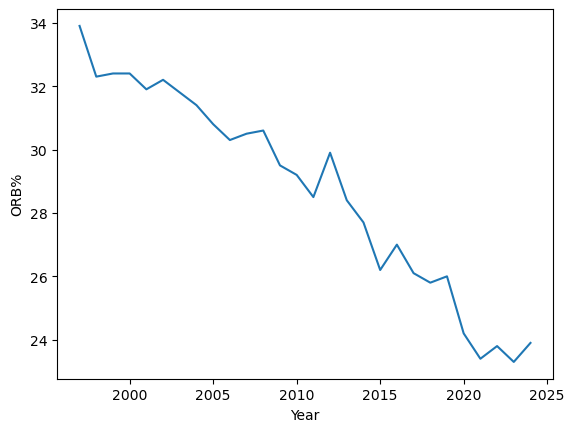

In [29]:
sns.lineplot(data = oreb,
           x='Year',
           y = 'ORB%')

In [125]:
fga = game_stats[['FGA', 'Year']][game_stats['Team']=='League Average']
fga

,FGA,Year
8,61.3,1997
10,61.0,1998
12,59.8,1999
16,58.2,2000
16,58.5,2001
16,58.5,2002
14,59.7,2003
13,58.3,2004
13,57.9,2005
14,64.2,2006


<Axes: xlabel='Year', ylabel='FGA'>

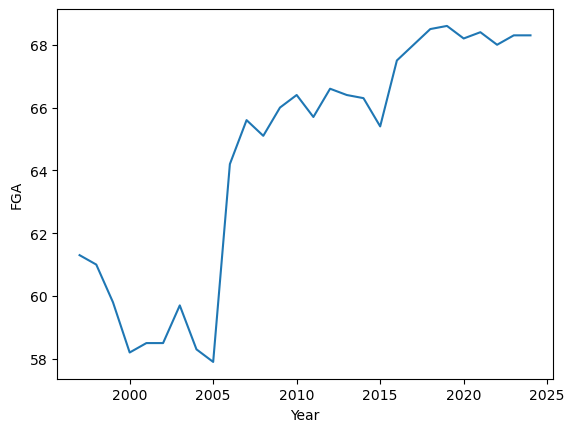

In [129]:
sns.lineplot(data = fga,
           x='Year',
           y = 'FGA')

In [312]:
efg = game_stats_1[['eFG%', 'Year']][game_stats_1['Team']=='League Average']
efg

,eFG%,Year
8,44.4,1997
10,45.4,1998
12,45.6,1999
16,46.8,2000
16,44.8,2001
16,45.8,2002
14,45.6,2003
13,45.7,2004
13,45.9,2005
14,46.4,2006


In [422]:
#Which and/or how many teams were shooting better than their oppenent?
better_efg = game_stats_1[['Team', 'eFG%', 'eFG%.1', 'Year']]
better_efg['pro'] = game_stats_1['eFG%'] - game_stats_1['eFG%.1']
better_efg

C:\Users\trmuh\AppData\Local\Temp\ipykernel_20316\25580902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  better_efg['pro'] = game_stats_1['eFG%'] - game_stats_1['eFG%.1']


,Team,eFG%,eFG%.1,Year,pro
0,Houston Comets,47.3,44.4,1997,2.9
1,Phoenix Mercury,41.1,44.1,1997,-3.0
2,New York Liberty,43.9,42.2,1997,1.7
3,Los Angeles Sparks,46.4,42.3,1997,4.1
4,Cleveland Rockers,46.4,44.9,1997,1.5
...,...,...,...,...,...
8,Phoenix Mercury,50.3,49.6,2024,0.7
9,Chicago Sky,45.7,49.9,2024,-4.2
10,Los Angeles Sparks,47.8,52.2,2024,-4.4
11,Dallas Wings,49.0,53.6,2024,-4.6


In [482]:
t.groupby(['Year', 'Team'])['pro'].max().reset_index().tail(18)

,Year,Team,pro
159,2022,Chicago Sky,5.2
160,2022,Connecticut Sun,1.4
161,2022,Las Vegas Aces,2.6
162,2022,New York Liberty,3.5
163,2022,Seattle Storm,2.4
164,2022,Washington Mystics,1.1
165,2023,Chicago Sky,0.2
166,2023,Connecticut Sun,1.2
167,2023,Las Vegas Aces,7.3
168,2023,New York Liberty,6.3


In [436]:
#Teams who were shooting better than their oppenent for at least half the league season total(27)
t_1 = t['Team'].value_counts().reset_index().head()
t_1

,Team,count
0,New York Liberty,21
1,Los Angeles Sparks,20
2,Phoenix Mercury,19
3,Seattle Storm,19
4,Minnesota Lynx,14


In [470]:
#Which teams? Top 5 teams from 2017-2024??
t = better_efg[better_efg['pro'] > 0][['Team', 'Year', 'pro']]
t

,Team,Year,pro
0,Houston Comets,1997,2.9
2,New York Liberty,1997,1.7
3,Los Angeles Sparks,1997,4.1
4,Cleveland Rockers,1997,1.5
5,Charlotte Sting,1997,3.3
...,...,...,...
3,Las Vegas Aces,2024,3.5
4,Seattle Storm,2024,0.1
5,Indiana Fever,2024,1.6
7,Washington Mystics,2024,0.4


In [404]:
#How many per year? XXXX
better[better['pro'] > 0].groupby('Year')['Team'].count().reset_index()

,Year,Team
0,1997,5
1,1998,6
2,1999,5
3,2000,8
4,2001,7
5,2002,7
6,2003,8
7,2004,6
8,2005,4
9,2006,7


<Axes: xlabel='Year', ylabel='eFG%'>

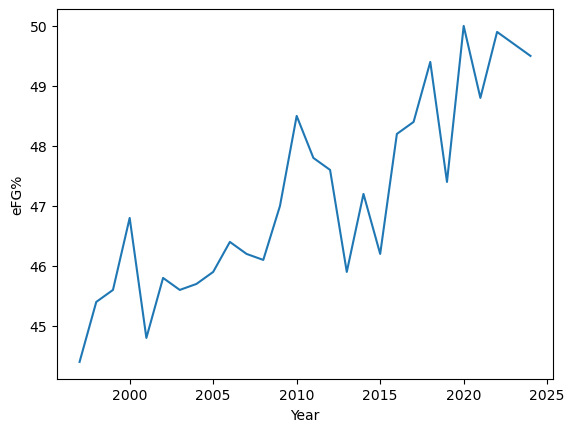

In [318]:
sns.lineplot(data = efg,
           x='Year',
           y = 'eFG%')

In [108]:
fta = game_stats[['FTA', 'Year']][game_stats['Team']=='League Average']
fta

,FTA,Year
8,20.7,1997
10,20.9,1998
12,20.3,1999
16,19.6,2000
16,17.9,2001
16,18.8,2002
14,18.4,2003
13,18.6,2004
13,19.1,2005
14,20.4,2006


<Axes: xlabel='Year', ylabel='FTA'>

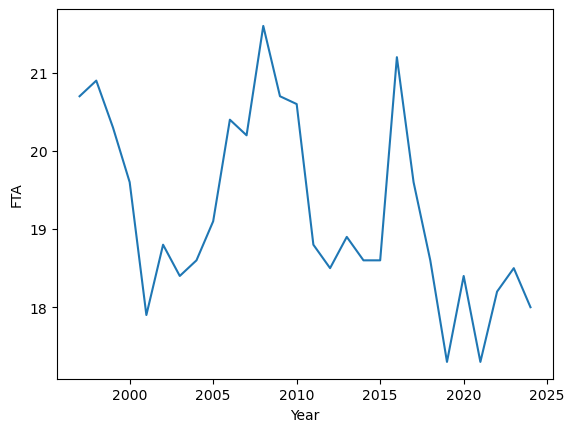

In [110]:
sns.lineplot(data = fta,
           x='Year',
           y = 'FTA')

In [118]:
ft = game_stats[['FT%', 'Year']][game_stats['Team']=='League Average']
ft

,FT%,Year
8,71.3,1997
10,71.7,1998
12,73.2,1999
16,74.0,2000
16,74.1,2001
16,74.3,2002
14,74.3,2003
13,74.1,2004
13,74.0,2005
14,74.7,2006


<Axes: xlabel='Year', ylabel='FT%'>

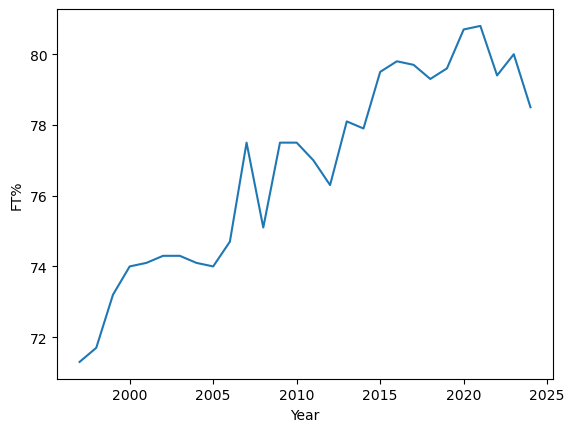

In [120]:
sns.lineplot(data = ft,
           x='Year',
           y = 'FT%')

# Attendance

In [131]:
total_games = elo_stats['season'].value_counts().reset_index().sort_values('season', ascending=True)
total_games

,season,count
25,1997,115
23,1998,158
22,1999,203
2,2000,272
0,2001,274
1,2002,273
5,2003,257
9,2004,240
10,2005,238
4,2006,257


Text(0, 0.5, 'Game Total')

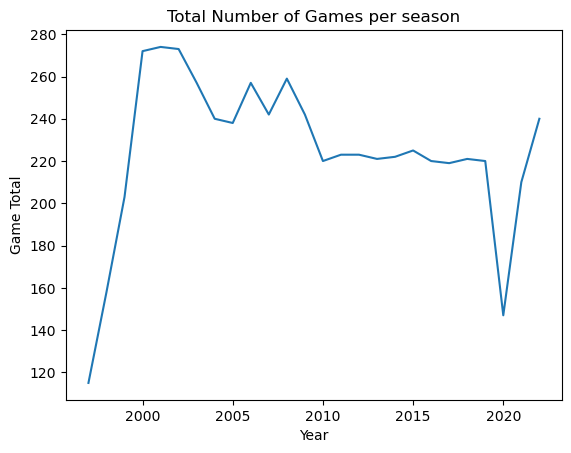

In [17]:
sns.lineplot(data = total_games,
           x='season',
           y = 'count')

plt.title('Total Number of Games per season')
plt.xlabel('Year')
plt.ylabel('Game Total')

In [18]:
teams = attendance['Year'].value_counts().reset_index().sort_values('Year', ascending=True)
teams

,Year,count
26,1997,8
25,1998,10
23,1999,12
0,2000,16
1,2001,16
2,2002,16
4,2003,14
6,2004,13
7,2005,13
3,2006,14


Text(0, 0.5, 'Number of Teams')

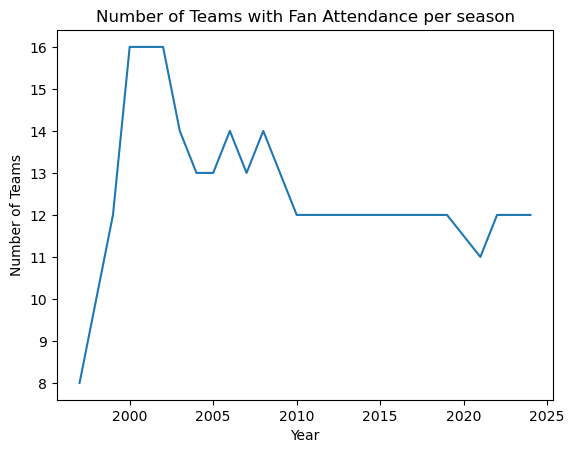

In [19]:
sns.lineplot(data = teams,
           x='Year',
           y = 'count')

plt.title('Number of Teams with Fan Attendance per season')
plt.xlabel('Year')
plt.ylabel('Number of Teams')

In [874]:
games = attendance[['Year', 'Num Games']]
games

,Year,Num Games
0,1997,14
1,1997,14
2,1997,14
3,1997,14
4,1997,14
...,...,...
7,2024,20
8,2024,20
9,2024,20
10,2024,20


In [153]:
high_att = attendance.groupby('Year')['Average'].max().reset_index()
high_att

,Year,Average
0,1997,13702.500000
1,1998,15909.800000
2,1999,15305.562500
3,2000,15258.375000
4,2001,15660.312500
5,2002,16202.312500
6,2003,14041.764706
7,2004,12614.588235
8,2005,10145.352941
9,2006,9642.588235


In [948]:
team_att = attendance[['Team', 'Average', 'Year']].sort_values('Average', ascending=False)
team_att = team_att[team_att['Year'].between(2010, 2024)].head(20)
team_att

,Team,Average,Year
0,Indiana Fever,17035.750000,2024
1,New York Liberty,12729.500000,2024
0,Los Angeles Sparks,11350.411765,2017
0,Los Angeles Sparks,11307.294118,2019
2,Las Vegas Aces,11282.850000,2024
3,Seattle Storm,11184.200000,2024
0,New York Liberty,11069.000000,2010
4,Los Angeles Sparks,11044.850000,2024
5,Phoenix Mercury,10714.800000,2024
0,Los Angeles Sparks,10641.764706,2018


In [988]:
team_att.to_csv('team_att.csv', index=False) 

<Axes: xlabel='Year', ylabel='Average'>

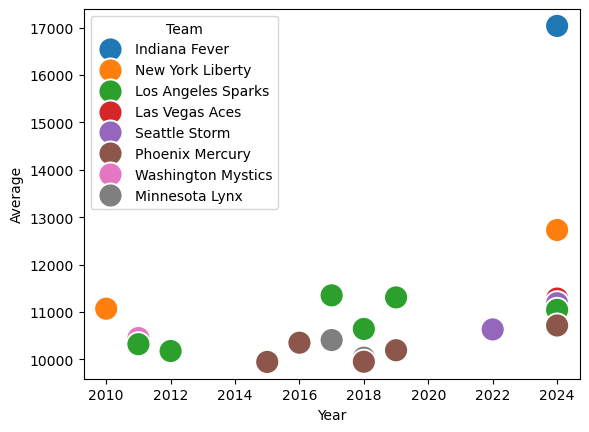

In [986]:
sns.scatterplot(data=team_att, x='Year', y='Average', hue='Team', s=300)

Text(0, 0.5, 'Number of Fans in Attendance per game')

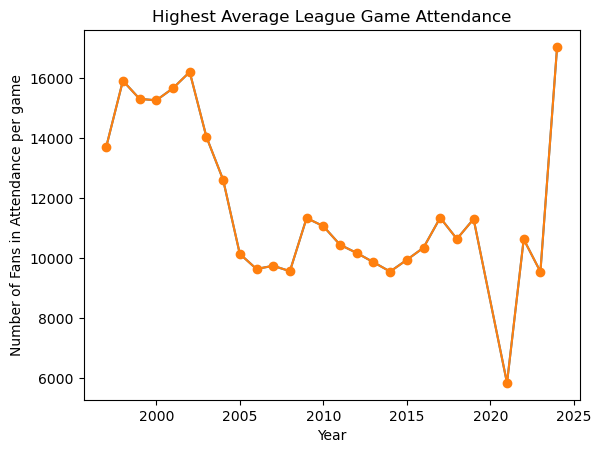

In [884]:
plt.plot(high_att['Year'], high_att['Average'])
plt.plot(high_att['Year'], high_att['Average'], marker='o')

plt.title("Highest Average League Game Attendance")
plt.xlabel('Year')
plt.ylabel('Number of Fans in Attendance per game')

In [808]:
box = attendance[['Team', 'Low', 'High', 'Total', 'Average', 'Year']]

In [810]:
org_1 = 'Utah Starzz'
org_1a = 'San Antonio Stars'
org_1b = 'Las Vegas Aces'
org_2 = 'Phoenix Mercury'
org_3 = 'New York Liberty'
org_4 = 'Los Angeles Sparks'
org_5 = 'Washington Mystics'
org_6 = 'Minnesota Lynx'
org_7 = 'Indiana Fever'
org_8 = 'Seattle Storm'
org_9 = 'Orlando Miracle'
org_9a = 'Connecticut Sun'
org_10 = 'Detroit Shock'
org_10a = 'Tulsa Shock'
org_10b = 'Dallas Wings'
org_11 = 'Chicago Sky'
org_12 = 'Atlanta Dream'
org_13 = 'Houston Comets', 'Charlotte Sting', 'Cleveland Rockers', 'Sacramento Monarchs', 'Portland Fire', 'Miami Sol'

relocated = org_1, org_1a, org_1b, org_9, org_9a, org_10, org_10a, org_10b
current = org_2, org_3, org_4, org_5, org_6, org_7, org_8, org_11, org_12
folded = org_13

In [812]:
box.loc[box['Team'].isin(relocated), 'org_status'] = 'Relocated'
box.loc[box['Team'].isin(current), 'org_status'] = 'Current'
box.loc[box['Team'].isin(folded), 'org_status'] = 'Folded'

In [852]:
box.to_csv('boxplot.csv', index=False) 

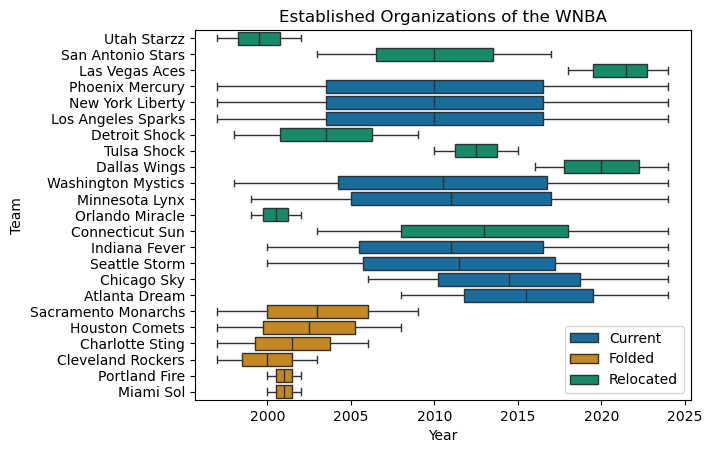

In [862]:
sns.boxplot(data=box, x='Year', y='Team', hue='org_status', palette='colorblind', order= ['Utah Starzz',
                    'San Antonio Stars',
                    'Las Vegas Aces',
                    'Phoenix Mercury',
                    'New York Liberty', 
                    'Los Angeles Sparks',
                    'Detroit Shock',
                    'Tulsa Shock',
                    'Dallas Wings',
                    'Washington Mystics',
                    'Minnesota Lynx',
                    'Orlando Miracle',
                    'Connecticut Sun',
                    'Indiana Fever',
                    'Seattle Storm',
                    'Chicago Sky',
                    'Atlanta Dream',
                    'Sacramento Monarchs', 'Houston Comets', 'Charlotte Sting', 'Cleveland Rockers', 'Portland Fire', 'Miami Sol'])

plt.title('Established Organizations of the WNBA')
plt.legend()